# Multi-Armed Bandits

Multi-armed bandit (MAB) problems are a class of sequential decision-making problems that model the trade-off between exploration and exploitation. The name comes from the metaphor of a gambler facing multiple slot machines (one-armed bandits), each with a different probability of payout. The gambler's objective is to maximize their total reward over a series of pulls. 

In the context of electricity markets, multi-armed bandit algorithms can be used for various purposes, such as optimizing dynamic pricing strategies, demand response programs, and marketing campaigns. In many cases, decisions need to be made in real-time under uncertainty. Multi-armed bandit algorithms provide a powerful framework for optimizing these decisions by learning from past actions and balancing the trade-off between exploring new strategies and exploiting known profitable ones. For instance, they can help in:
- **Dynamic pricing**: adjusting prices based on consumer behaviour to maximise revenue.
- **Demand response**: determining the most effective incentives to reduce peak demand.
- **Marketing campaigns**: identifying the most effective promotional strategies to increase customer engagement.


The MAB problem can be formalized as follows:
- **Arms**: let $K$ be the number of arms (choices or actions) available.
- **Rewards**: each arm $k \in \{1, 2, \ldots, K\}$ provides a reward $r_k(t)$ at time $t$.
- **Objective**: the objective is to maximize the cumulative reward over $T$ rounds, $\sum_{t=1}^{T} r_k(t)$.

The two key conepts in MAB problems are:
1. **Exploration vs. exploitation**: where **exploration** means trying out different arms to gather more information about their rewards, and **exploitation** refers to choosing the arm that is currently believed to provide the highest reward.
2. **Regret**: the difference between the reward obtained by the optimal arm and the reward obtained by the algorithm. The goal is to minimize regret over time.


Let's break down the MAB problem step by step, focusing on the concepts of exploration, reward, and how they are computed.

**Step-by-step illustration**

**Setup**

Imagine you have three slot machines (arms) in a casino, each with an unknown probability of payout (reward). Initially, you do not know which machine is the best, so you need to **explore** by trying out each machine. Over time, as you gather more information, you start to get an idea about the different machines and can **exploit** the available information by choosing the machine that seems to give the highest reward based on your observations.

**True reward probabilities**:
- Slot Machine 1: 0.3
- Slot Machine 2: 0.5
- Slot Machine 3: 0.7

These probabilities are unknown to you. Your goal is to find out which machine has the highest probability of giving a payout by trying them out.

**Step 1: initial exploration**

To start, you need to try each machine a few times to get an idea of their payouts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# True reward probabilities
true_means = [0.3, 0.5, 0.7]

# Number of times to pull each machine initially
initial_pulls = 10

# Simulate initial exploration
np.random.seed(42)
initial_rewards = []

for i in range(len(true_means)):
    rewards = []
    for _ in range(initial_pulls):
        reward = 1 if np.random.rand() < true_means[i] else 0
        rewards.append(reward)
    initial_rewards.append(rewards)

# Print initial rewards
for i, rewards in enumerate(initial_rewards):
    print(f"Rewards for Machine {i + 1}: {rewards}")

Rewards for Machine 1: [0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
Rewards for Machine 2: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1]
Rewards for Machine 3: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


**Step 2: compute average rewards**

After the initial exploration, compute the average reward for each machine to get an estimate of their payout probabilities.

In [2]:
# Calculate average rewards
average_rewards = [np.mean(rewards) for rewards in initial_rewards]

# Print average rewards
for i, avg in enumerate(average_rewards):
    print(f"Average reward for Machine {i + 1}: {avg:.2f}")

Average reward for Machine 1: 0.30
Average reward for Machine 2: 0.70
Average reward for Machine 3: 0.90


The mean of the rewards obtained from the initial pulls for each machine. This gives an estimate of the payout probability for each machine.

**Step 3: exploitation**

Based on the average rewards, you start choosing the machine that seems to give the highest reward more often.

In [3]:
# Number of additional rounds
additional_rounds = 90

# Continue simulation
total_rewards = initial_rewards.copy()
cumulative_rewards = np.zeros(initial_pulls * 3 + additional_rounds)
cumulative_rewards[:initial_pulls * 3] = np.array([sum(rewards) for rewards in initial_rewards]).repeat(initial_pulls)

for t in range(additional_rounds):
    # Choose the machine with the highest average reward
    best_machine = np.argmax(average_rewards)
    
    # Simulate pulling the best machine
    reward = 1 if np.random.rand() < true_means[best_machine] else 0
    total_rewards[best_machine].append(reward)
    
    # Update average rewards
    average_rewards[best_machine] = np.mean(total_rewards[best_machine])
    
    # Update cumulative rewards
    cumulative_rewards[initial_pulls * 3 + t] = cumulative_rewards[initial_pulls * 3 + t - 1] + reward

# Print final average rewards
for i, avg in enumerate(average_rewards):
    print(f"Final average reward for Machine {i + 1}: {avg:.2f}")

Final average reward for Machine 1: 0.30
Final average reward for Machine 2: 0.64
Final average reward for Machine 3: 0.70


At each step, we define as **best machine** the machine with the highest average reward so far, and we continue pulling the best machine and update the average rewards based on the new observations.

**Step 4: regret calculation**

Regret is a measure of how much worse our algorithm performs compared to if we had always chosen the best possible machine (the one with the highest true mean reward). If we knew in advance which machine had the highest probability of giving us a prize, we would always choose that machine. However, since we do not know this in advance, we have to try out all the machines to gather information. While we are trying out all the machines (exploring), we might choose the less optimal machines sometimes, which gives us less reward compared to the best machine.
Regret is the difference between the total reward we would have gotten by always choosing the best machine and the total reward we actually got by following our algorithm.

We have:
- Optimal reward: this is the reward we would have gotten if we had always chosen the best machine. It is calculated as the cumulative sum of the highest true mean reward over all rounds.
- Algorithm reward: this is the reward we actually got by following our algorithm, which includes exploration and exploitation steps.
- Regret: the difference between the optimal reward and the algorithm reward,

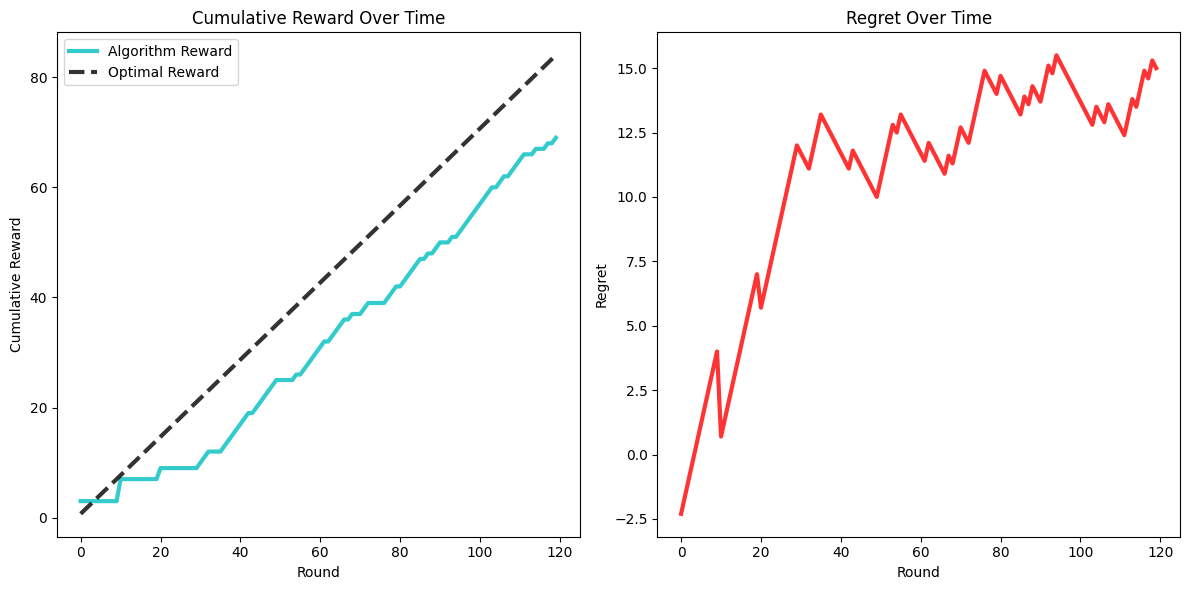

In [4]:
# True means and optimal reward
optimal_mean = max(true_means)
optimal_cumulative_rewards = np.cumsum([optimal_mean] * (initial_pulls * 3 + additional_rounds))

# Calculate regret
regret = optimal_cumulative_rewards - cumulative_rewards

# Plot cumulative rewards and regret
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards, label='Algorithm Reward', lw=3, c='c', alpha=.8)
plt.plot(optimal_cumulative_rewards, label='Optimal Reward', linestyle='--', lw=3, c='k', alpha=.8)
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(regret, label='Regret', color='r', lw=3, alpha=.8)
plt.xlabel('Round')
plt.ylabel('Regret')
plt.title('Regret Over Time')

plt.tight_layout()
plt.show()

**How to read these graphs**:

1. **Cumulative reward**:
   - This graph shows the total reward accumulated over time by the algorithm.
   - The x-axis represents the number of rounds (time), and the y-axis represents the cumulative reward.
   - Initially, during the exploration phase, the rewards might increase slowly because the algorithm is trying out different arms to gather information.
   - As the algorithm gathers more information and starts to exploit the best-performing arm, the slope of the cumulative reward graph should increase, indicating a faster accumulation of rewards.
   - The optimal cumulative reward line represents the reward we would have accumulated if we had always chosen the best arm from the beginning. This line has a constant, steep slope, indicating the highest possible reward accumulation rate.

2. **Regret**:
   - This graph shows the difference between the optimal cumulative reward and the cumulative reward obtained by the algorithm.
   - The x-axis represents the number of rounds (time), and the y-axis represents the regret.
   - At the beginning, the regret might increase rapidly because the algorithm is exploring and might be choosing suboptimal arms, leading to lower rewards compared to the optimal arm.
   - As the algorithm starts to exploit the best-performing arm more frequently, the rate at which regret increases should slow down. Ideally, the regret graph will start to flatten out, indicating that the algorithm is performing close to optimally.
   - The ideal scenario is to have a regret graph that flattens out as early as possible, showing that the algorithm quickly learned to choose the best arm.



#### Code Example: Exploitation

Let's simulate pulling the machines for an additional 90 rounds, primarily exploiting the machine with the highest average reward so far.

```python

```

### Explanation



### Plotting the Results

Visualize the cumulative rewards over time to see the effect of exploration and exploitation.

```python

```

### Summary

1. **Exploration**: Trying out different machines to gather information about their payout probabilities.
2. **Reward**: The payout received from each pull of the machine, determined by comparing a random number to the machine's true probability.
3. **Exploitation**: Using the gathered information to choose the machine with the highest estimated payout probability more often.
4. **Cumulative Rewards**: Tracking the total rewards over time to see the benefits of balancing exploration and exploitation.

By understanding these steps and concepts, you can grasp the fundamental idea behind the multi-armed bandit problem and how to balance exploration and exploitation to maximize rewards.

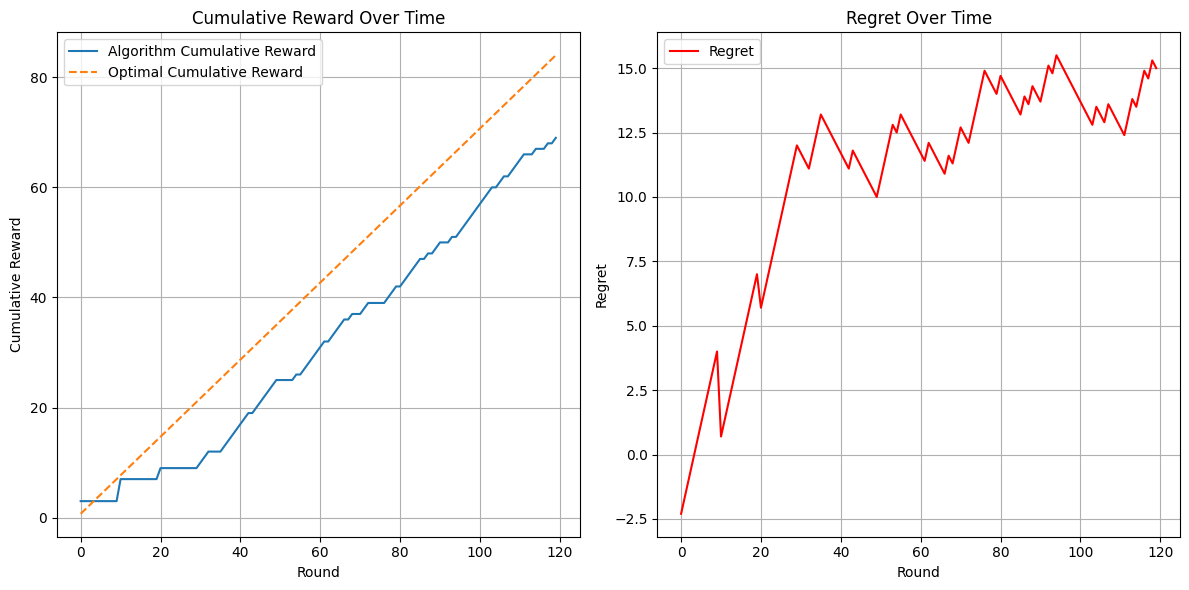

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# True reward probabilities
true_means = [0.3, 0.5, 0.7]

# Number of times to pull each machine initially
initial_pulls = 10

# Simulate initial exploration
np.random.seed(42)
initial_rewards = []

for i in range(len(true_means)):
    rewards = []
    for _ in range(initial_pulls):
        reward = 1 if np.random.rand() < true_means[i] else 0
        rewards.append(reward)
    initial_rewards.append(rewards)

# Calculate average rewards
average_rewards = [np.mean(rewards) for rewards in initial_rewards]

# Number of additional rounds
additional_rounds = 90

# Continue simulation
total_rewards = initial_rewards.copy()
cumulative_rewards = np.zeros(initial_pulls * 3 + additional_rounds)
cumulative_rewards[:initial_pulls * 3] = np.array([sum(rewards) for rewards in initial_rewards]).repeat(initial_pulls)

for t in range(additional_rounds):
    # Choose the machine with the highest average reward
    best_machine = np.argmax(average_rewards)
    
    # Simulate pulling the best machine
    reward = 1 if np.random.rand() < true_means[best_machine] else 0
    total_rewards[best_machine].append(reward)
    
    # Update average rewards
    average_rewards[best_machine] = np.mean(total_rewards[best_machine])
    
    # Update cumulative rewards
    cumulative_rewards[initial_pulls * 3 + t] = cumulative_rewards[initial_pulls * 3 + t - 1] + reward

# True means and optimal reward
optimal_mean = max(true_means)
optimal_cumulative_rewards = np.cumsum([optimal_mean] * (initial_pulls * 3 + additional_rounds))

# Calculate regret
regret = optimal_cumulative_rewards - cumulative_rewards

# Plot cumulative rewards and regret
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards, label='Algorithm Cumulative Reward')
plt.plot(optimal_cumulative_rewards, label='Optimal Cumulative Reward', linestyle='--')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Time')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(regret, label='Regret', color='red')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.title('Regret Over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


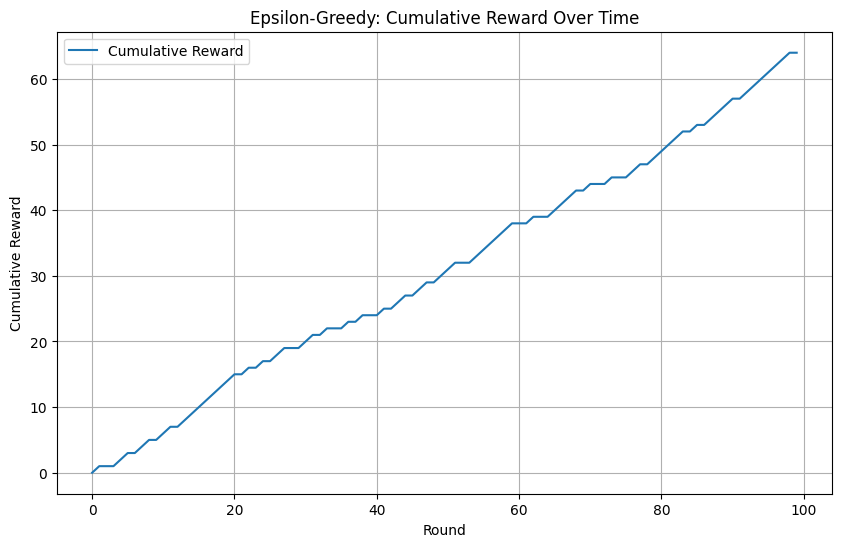

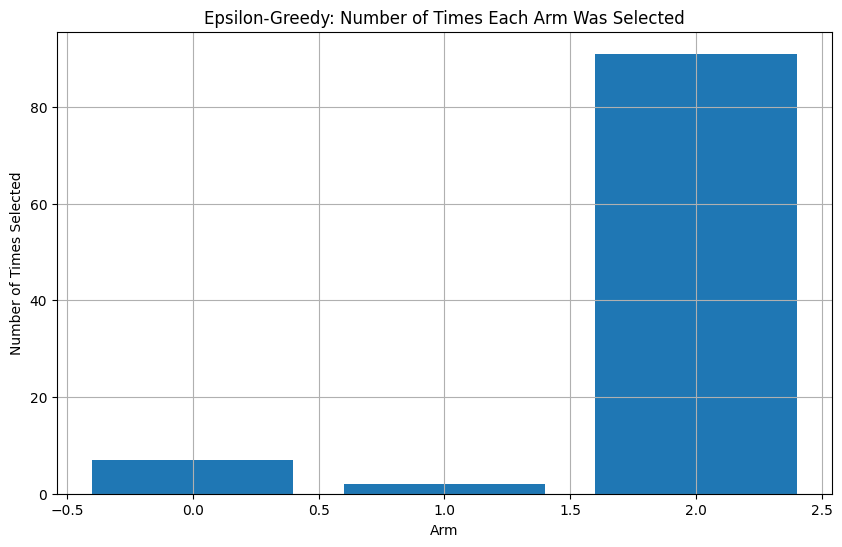

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_arms = 3
true_means = [0.3, 0.5, 0.7]  # True reward probabilities for each arm
n_rounds = 100

# Initialize parameters
estimated_means = np.zeros(n_arms)
counts = np.zeros(n_arms)
total_reward = 0
rewards = []
selected_arms = []

# Epsilon-Greedy parameters
epsilon = 0.1

# Epsilon-Greedy algorithm
for t in range(1, n_rounds + 1):
    if np.random.rand() < epsilon:
        # Exploration: choose a random arm
        arm = np.random.choice(n_arms)
    else:
        # Exploitation: choose the best arm so far
        arm = np.argmax(estimated_means)
    
    # Simulate pulling the arm
    reward = np.random.rand() < true_means[arm]
    
    # Update estimates and counts
    counts[arm] += 1
    estimated_means[arm] += (reward - estimated_means[arm]) / counts[arm]
    
    # Accumulate rewards
    total_reward += reward
    rewards.append(total_reward)
    selected_arms.append(arm)

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards, label='Cumulative Reward')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy: Cumulative Reward Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of times each arm was selected
plt.figure(figsize=(10, 6))
plt.bar(range(n_arms), counts)
plt.xlabel('Arm')
plt.ylabel('Number of Times Selected')
plt.title('Epsilon-Greedy: Number of Times Each Arm Was Selected')
plt.grid(True)
plt.show()


Sure! Let's provide a high-level intuition followed by the mathematical details for each of the three algorithms: Epsilon-Greedy, Upper Confidence Bound (UCB), and Thompson Sampling.

---

### Multi-Armed Bandits

## Introduction

Multi-armed bandit (MAB) problems are a class of sequential decision-making problems that model the trade-off between exploration and exploitation. The name comes from the metaphor of a gambler facing multiple slot machines (one-armed bandits), each with a different probability of payout. The gambler's objective is to maximize their total reward over a series of pulls. In the context of electricity markets, multi-armed bandit algorithms can be used for various purposes, such as optimizing dynamic pricing strategies, demand response programs, and marketing campaigns.

## Relevance in Electricity Markets

In electricity markets, decisions need to be made in real-time under uncertainty. Multi-armed bandit algorithms provide a powerful framework for optimizing these decisions by learning from past actions and balancing the trade-off between exploring new strategies and exploiting known profitable ones. For instance, they can help in:
- **Dynamic Pricing**: Adjusting prices based on consumer behavior to maximize revenue.
- **Demand Response**: Determining the most effective incentives to reduce peak demand.
- **Marketing Campaigns**: Identifying the most effective promotional strategies to increase customer engagement.

## Mathematical Formulation

The MAB problem can be formalized as follows:
- **Arms**: Let $K$ be the number of arms (choices or actions) available.
- **Rewards**: Each arm $k \in \{1, 2, \ldots, K\}$ provides a reward $r_k(t)$ at time $t$.
- **Objective**: The objective is to maximize the cumulative reward over $T$ rounds, \(\sum_{t=1}^{T} r_k(t)$.

### Key Concepts

1. **Exploration vs. Exploitation**: 
   - **Exploration**: Trying out different arms to gather more information about their rewards.
   - **Exploitation**: Choosing the arm that is currently believed to provide the highest reward.

2. **Regret**:
   - **Regret** is the difference between the reward obtained by the optimal arm and the reward obtained by the algorithm.
   - The goal is to minimize regret over time.

### Algorithms

Several popular algorithms have been proposed to solve MAB problems, including:

### Epsilon-Greedy

#### High-Level Intuition
Epsilon-Greedy is a simple yet effective algorithm that balances exploration and exploitation. The basic idea is to explore a random arm with a small probability (epsilon) and exploit the best-known arm with the remaining probability.

#### Mathematical Details
- **Mechanism**:
  - With probability $\epsilon$, choose a random arm (exploration).
  - With probability $1 - \epsilon$, choose the arm with the highest estimated reward (exploitation).
- **Formulation**:
  - Let $\hat{\mu}_k(t)$ be the estimated mean reward of arm $k$ at time $t$.
  - Update rule for the estimate:
    \begin{equation}
    \hat{\mu}_k(t+1) = \hat{\mu}_k(t) + \frac{r_k(t) - \hat{\mu}_k(t)}{n_k(t)}
    \end{equation}
    where $r_k(t)$ is the observed reward and $n_k(t)$ is the number of times arm $k$ has been selected up to time $t$.

### Upper Confidence Bound (UCB)

#### High-Level Intuition
The UCB algorithm selects arms based on the principle of optimism in the face of uncertainty. It balances exploration and exploitation by choosing the arm with the highest upper confidence bound, which accounts for both the estimated reward and the uncertainty in the estimate.

#### Mathematical Details
- **Mechanism**:
  - Select the arm $k$ that maximizes the upper confidence bound $UCB_k(t)$.
- **Formulation**:
  - The upper confidence bound for arm $k$ at time $t$ is given by:
    \begin{equation}
    UCB_k(t) = \hat{\mu}_k(t) + c \sqrt{\frac{\ln t}{n_k(t)}}
    \end{equation}
    where $\hat{\mu}_k(t)$ is the estimated mean reward, $n_k(t)$ is the number of times arm $k$ has been selected, and $c$ is a confidence parameter.

### Thompson Sampling

#### High-Level Intuition
Thompson Sampling is a Bayesian approach that balances exploration and exploitation by sampling from the posterior distribution of the reward probabilities for each arm. It chooses the arm with the highest sampled value, which inherently balances the trade-off.

#### Mathematical Details
- **Mechanism**:
  - Maintain a probability distribution (posterior) for the expected reward of each arm.
  - Sample a value from the posterior distribution for each arm and select the arm with the highest sampled value.
- **Formulation**:
  - Assume a Beta distribution for the reward probabilities:
    \begin{equation}
    \theta_k \sim \text{Beta}(\alpha_k, \beta_k)
    \end{equation}
    where $\alpha_k$ and $\beta_k$ are the parameters of the Beta distribution.
  - Update the parameters based on observed rewards:
    \begin{equation}
    \alpha_k = \alpha_k + r_k(t)
    \end{equation}
    \begin{equation}
    \beta_k = \beta_k + 1 - r_k(t)
    \end{equation}

## Example in Python

Let's implement a simple multi-armed bandit problem using the Epsilon-Greedy, UCB, Thompson Sampling, and Random strategies.

### Step-by-Step Implementation

1. **Define the Environment**:
   - Simulate the reward probabilities for each arm.

2. **Implement the Algorithms**:
   - Initialize the estimates and counts for each arm.
   - Iterate through multiple rounds, selecting arms based on each strategy.

3. **Plot the Results**:
   - Visualize the cumulative rewards and the number of times each arm is selected.

```python
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_arms = 5
true_means = np.random.rand(n_arms)  # True reward probabilities for each arm
n_rounds = 1000

# Initialize parameters for all algorithms
estimated_means = np.zeros(n_arms)
counts = np.zeros(n_arms)
total_rewards = {'epsilon_greedy': 0, 'ucb': 0, 'thompson': 0, 'random': 0}
rewards = {'epsilon_greedy': [], 'ucb': [], 'thompson': [], 'random': []}

# Epsilon-Greedy parameters
epsilon = 0.1

# Upper Confidence Bound (UCB) parameters
ucb_counts = np.zeros(n_arms)
ucb_means = np.zeros(n_arms)

# Thompson Sampling parameters
alpha = np.ones(n_arms)
beta = np.ones(n_arms)

# Simulation
for t in range(1, n_rounds + 1):
    # Epsilon-Greedy
    if np.random.rand() < epsilon:
        arm = np.random.choice(n_arms)
    else:
        arm = np.argmax(estimated_means)
    reward = np.random.rand() < true_means[arm]
    counts[arm] += 1
    estimated_means[arm] += (reward - estimated_means[arm]) / counts[arm]
    total_rewards['epsilon_greedy'] += reward
    rewards['epsilon_greedy'].append(total_rewards['epsilon_greedy'])

    # UCB
    ucb_values = ucb_means + np.sqrt(2 * np.log(t) / (ucb_counts + 1))
    arm = np.argmax(ucb_values)
    reward = np.random.rand() < true_means[arm]
    ucb_counts[arm] += 1
    ucb_means[arm] += (reward - ucb_means[arm]) / ucb_counts[arm]
    total_rewards['ucb'] += reward
    rewards['ucb'].append(total_rewards['ucb'])

    # Thompson Sampling
    theta = np.random.beta(alpha, beta)
    arm = np.argmax(theta)
    reward = np.random.rand() < true_means[arm]
    alpha[arm] += reward
    beta[arm] += 1 - reward
    total_rewards['thompson'] += reward
    rewards['thompson'].append(total_rewards['thompson'])

    # Random Sampling
    arm = np.random.choice(n_arms)
    reward = np.random.rand() < true_means[arm]
    total_rewards['random'] += reward
    rewards['random'].append(total_rewards['random'])

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
for strategy in rewards:
    plt.plot(rewards[strategy], label=strategy.capitalize())
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Multi-Armed Bandit: Cumulative Reward Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of times each arm was selected for each strategy
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Number of Times Each Arm Was Selected')

strategies = ['epsilon_greedy', 'ucb', 'thompson', 'random']
for i, strategy in enumerate(strategies):
    ax = axs[i//2, i%2]
    ax.bar(range(n_arms), counts)
    ax

Several popular algorithms have been proposed to solve MAB problems, including:
- **Epsilon-Greedy**: with probability $\epsilon$, choose a random arm (exploration), and with probability $1 - \epsilon$, choose the arm with the highest estimated reward (exploitation).
- **Upper Confidence Bound (UCB)**: selects arms based on the upper confidence bounds of their estimated rewards.
- **Thompson Sampling**: uses Bayesian methods to update beliefs about the reward distributions and selects arms based on the posterior probabilities.

Sure, let's enhance the tutorial to provide a more pedagogic introduction to the concept of exploration vs. exploitation. We'll use a practical example to demonstrate the trade-off, and show how it impacts the decision-making process and regret.

---

# Multi-Armed Bandits

## Introduction

Multi-armed bandit (MAB) problems are a class of sequential decision-making problems that model the trade-off between exploration and exploitation. The name comes from the metaphor of a gambler facing multiple slot machines (one-armed bandits), each with a different probability of payout. The gambler's objective is to maximize their total reward over a series of pulls. In the context of electricity markets, multi-armed bandit algorithms can be used for various purposes, such as optimizing dynamic pricing strategies, demand response programs, and marketing campaigns.

## Relevance in Electricity Markets

In electricity markets, decisions need to be made in real-time under uncertainty. Multi-armed bandit algorithms provide a powerful framework for optimizing these decisions by learning from past actions and balancing the trade-off between exploring new strategies and exploiting known profitable ones. For instance, they can help in:
- **Dynamic Pricing**: Adjusting prices based on consumer behavior to maximize revenue.
- **Demand Response**: Determining the most effective incentives to reduce peak demand.
- **Marketing Campaigns**: Identifying the most effective promotional strategies to increase customer engagement.

## Exploration vs. Exploitation

### High-Level Intuition

Exploration vs. exploitation is the core trade-off in multi-armed bandit problems:
- **Exploration**: Trying out different arms (choices or actions) to gather more information about their rewards.
- **Exploitation**: Choosing the arm that is currently believed to provide the highest reward based on the gathered information.

### Practical Example

Let's illustrate this with a simple example involving three slot machines (arms), each with a different but unknown probability of payout (reward). Initially, we don't know which machine is the best, so we need to explore by trying out each machine. Over time, as we gather more information, we start to exploit by choosing the machine that seems to give the highest reward based on our observations.

### Simulating the Example

We'll simulate a scenario with three arms, each with a different probability of payout. We'll track how often we choose each arm and the cumulative reward over time.

```python
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_arms = 3
true_means = [0.3, 0.5, 0.7]  # True reward probabilities for each arm
n_rounds = 100

# Initialize parameters
estimated_means = np.zeros(n_arms)
counts = np.zeros(n_arms)
total_reward = 0
rewards = []
selected_arms = []

# Epsilon-Greedy parameters
epsilon = 0.1

# Epsilon-Greedy algorithm
for t in range(1, n_rounds + 1):
    if np.random.rand() < epsilon:
        # Exploration: choose a random arm
        arm = np.random.choice(n_arms)
    else:
        # Exploitation: choose the best arm so far
        arm = np.argmax(estimated_means)
    
    # Simulate pulling the arm
    reward = np.random.rand() < true_means[arm]
    
    # Update estimates and counts
    counts[arm] += 1
    estimated_means[arm] += (reward - estimated_means[arm]) / counts[arm]
    
    # Accumulate rewards
    total_reward += reward
    rewards.append(total_reward)
    selected_arms.append(arm)

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards, label='Cumulative Reward')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy: Cumulative Reward Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of times each arm was selected
plt.figure(figsize=(10, 6))
plt.bar(range(n_arms), counts)
plt.xlabel('Arm')
plt.ylabel('Number of Times Selected')
plt.title('Epsilon-Greedy: Number of Times Each Arm Was Selected')
plt.grid(True)
plt.show()
```

### Analysis

1. **Cumulative Rewards**:
   - The plot shows how the total reward accumulates over time. Initially, exploration leads to variability in the cumulative reward, but over time, the algorithm converges towards the best arm, leading to more consistent rewards.

2. **Number of Times Each Arm Was Selected**:
   - This plot illustrates the balance between exploration and exploitation. The arm with the highest estimated reward gets selected more frequently, but the other arms are also tried occasionally due to the exploration factor.

### Understanding Regret

**Regret** is the difference between the reward obtained by always choosing the best arm and the reward obtained by the algorithm. In practical terms, regret measures the opportunity cost of not always exploiting the best option due to exploration. Minimizing regret over time is a key objective in MAB problems.

### Mathematical Formulation

The MAB problem can be formalized as follows:
- **Arms**: Let \( K \) be the number of arms (choices or actions) available.
- **Rewards**: Each arm \( k \in \{1, 2, \ldots, K\} \) provides a reward \( r_k(t) \) at time \( t \).
- **Objective**: The objective is to maximize the cumulative reward over \( T \) rounds, \(\sum_{t=1}^{T} r_k(t) \).

## Algorithms

Several popular algorithms have been proposed to solve MAB problems, including:

### Epsilon-Greedy

#### High-Level Intuition
Epsilon-Greedy is a simple yet effective algorithm that balances exploration and exploitation. The basic idea is to explore a random arm with a small probability (epsilon) and exploit the best-known arm with the remaining probability.

#### Mathematical Details
- **Mechanism**:
  - With probability \( \epsilon \), choose a random arm (exploration).
  - With probability \( 1 - \epsilon \), choose the arm with the highest estimated reward (exploitation).
- **Formulation**:
  - Let \( \hat{\mu}_k(t) \) be the estimated mean reward of arm \( k \) at time \( t \).
  - Update rule for the estimate:
    \[
    \hat{\mu}_k(t+1) = \hat{\mu}_k(t) + \frac{r_k(t) - \hat{\mu}_k(t)}{n_k(t)}
    \]
    where \( r_k(t) \) is the observed reward and \( n_k(t) \) is the number of times arm \( k \) has been selected up to time \( t \).

### Upper Confidence Bound (UCB)

#### High-Level Intuition
The UCB algorithm selects arms based on the principle of optimism in the face of uncertainty. It balances exploration and exploitation by choosing the arm with the highest upper confidence bound, which accounts for both the estimated reward and the uncertainty in the estimate.

#### Mathematical Details
- **Mechanism**:
  - Select the arm \( k \) that maximizes the upper confidence bound \( UCB_k(t) \).
- **Formulation**:
  - The upper confidence bound for arm \( k \) at time \( t \) is given by:
    \[
    UCB_k(t) = \hat{\mu}_k(t) + c \sqrt{\frac{\ln t}{n_k(t)}}
    \]
    where \( \hat{\mu}_k(t) \) is the estimated mean reward, \( n_k(t) \) is the number of times arm \( k \) has been selected, and \( c \) is a confidence parameter.

### Thompson Sampling

#### High-Level Intuition
Thompson Sampling is a Bayesian approach that balances exploration and exploitation by sampling from the posterior distribution of the reward probabilities for each arm. It chooses the arm with the highest sampled value, which inherently balances the trade-off.

#### Mathematical Details
- **Mechanism**:
  - Maintain a probability distribution (posterior) for the expected reward of each arm.
  - Sample a value from the posterior distribution for each arm and select the arm with the highest sampled value.
- **Formulation**:
  - Assume a Beta distribution for the reward probabilities:
    \[
    \theta_k \sim \text{Beta}(\alpha_k, \beta_k)
    \]
    where \( \alpha_k \) and \( \beta_k \) are the parameters of the Beta distribution.
  - Update the parameters based on observed rewards:
    \[
    \alpha_k = \alpha_k + r_k(t)
    \]
    \[
    \beta_k = \beta_k + 1 - r_k(t)
    \]

## Example in Python

Let's implement a simple multi-armed bandit problem using the Epsilon-Greedy, UCB, Thompson Sampling, and Random strategies.

### Step-by-Step Implementation

1. **Define the Environment**:
   - Simulate the reward probabilities for each arm.

2. **Implement the Algorithms**:
   - Initialize the estimates and counts for each arm.
   - Iterate through multiple rounds, selecting arms based on each strategy.

3. **Plot the Results**:
   - Visualize the cumulative rewards and the number of times each arm is selected.

```python
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_arms = 5
true_means = np.random.rand(n_arms)  # True reward probabilities for each arm
n_rounds = 1000

# Initialize parameters for all algorithms
estimated_means = np.zeros(n_arms

)
counts = np.zeros(n_arms)
total_rewards = {'epsilon_greedy': 0, 'ucb': 0, 'thompson': 0, 'random': 0}
rewards = {'epsilon_greedy': [], 'ucb': [], 'thompson': [], 'random': []}

# Epsilon-Greedy parameters
epsilon = 0.1

# Upper Confidence Bound (UCB) parameters
ucb_counts = np.zeros(n_arms)
ucb_means = np.zeros(n_arms)

# Thompson Sampling parameters
alpha = np.ones(n_arms)
beta = np.ones(n_arms)

# Simulation
for t in range(1, n_rounds + 1):
    # Epsilon-Greedy
    if np.random.rand() < epsilon:
        arm = np.random.choice(n_arms)  # Exploration
    else:
        arm = np.argmax(estimated_means)  # Exploitation
    reward = np.random.rand() < true_means[arm]
    counts[arm] += 1
    estimated_means[arm] += (reward - estimated_means[arm]) / counts[arm]
    total_rewards['epsilon_greedy'] += reward
    rewards['epsilon_greedy'].append(total_rewards['epsilon_greedy'])

    # UCB
    ucb_values = ucb_means + np.sqrt(2 * np.log(t) / (ucb_counts + 1))
    arm = np.argmax(ucb_values)
    reward = np.random.rand() < true_means[arm]
    ucb_counts[arm] += 1
    ucb_means[arm] += (reward - ucb_means[arm]) / ucb_counts[arm]
    total_rewards['ucb'] += reward
    rewards['ucb'].append(total_rewards['ucb'])

    # Thompson Sampling
    theta = np.random.beta(alpha, beta)
    arm = np.argmax(theta)
    reward = np.random.rand() < true_means[arm]
    alpha[arm] += reward
    beta[arm] += 1 - reward
    total_rewards['thompson'] += reward
    rewards['thompson'].append(total_rewards['thompson'])

    # Random Sampling
    arm = np.random.choice(n_arms)
    reward = np.random.rand() < true_means[arm]
    total_rewards['random'] += reward
    rewards['random'].append(total_rewards['random'])

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
for strategy in rewards:
    plt.plot(rewards[strategy], label=strategy.capitalize())
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Multi-Armed Bandit: Cumulative Reward Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of times each arm was selected for each strategy
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Number of Times Each Arm Was Selected')

strategies = ['epsilon_greedy', 'ucb', 'thompson', 'random']
for i, strategy in enumerate(strategies):
    ax = axs[i//2, i%2]
    ax.bar(range(n_arms), counts)
    ax.set_title(strategy.capitalize())
    ax.set_xlabel('Arm')
    ax.set_ylabel('Number of Times Selected')
    ax.grid(True)

plt.tight_layout()
plt.show()
```

### Explanation

1. **Environment Setup**:
   - `true_means` defines the true reward probabilities for each arm.

2. **Algorithm Implementation**:
   - **Epsilon-Greedy**: Balances exploration and exploitation by choosing random arms with probability \( \epsilon \) and the best-known arm with probability \( 1 - \epsilon \).
   - **UCB**: Selects arms based on the upper confidence bounds of their estimated rewards, balancing exploration and exploitation by considering the uncertainty in the estimates.
   - **Thompson Sampling**: Uses Bayesian methods to update beliefs about the reward distributions and selects arms based on the posterior probabilities.
   - **Random Sampling**: Chooses arms randomly without any learning, serving as a baseline for comparison.

3. **Visualization**:
   - The cumulative reward plot shows how the total reward accumulates over time for each strategy.
   - The bar plots show the number of times each arm was selected by each strategy, indicating how exploration and exploitation were balanced.

### Conclusion

Multi-armed bandit algorithms are powerful tools for making sequential decisions under uncertainty. By balancing exploration and exploitation, these algorithms can optimize decisions in various contexts, including dynamic pricing, demand response, and marketing campaigns in electricity markets. This tutorial demonstrated the basic principles and implementation of Epsilon-Greedy, UCB, and Thompson Sampling algorithms, providing a foundation for more advanced techniques and applications.

---

This comprehensive tutorial introduces the key concepts and algorithms for solving MAB problems, using practical examples and visualizations to aid understanding.

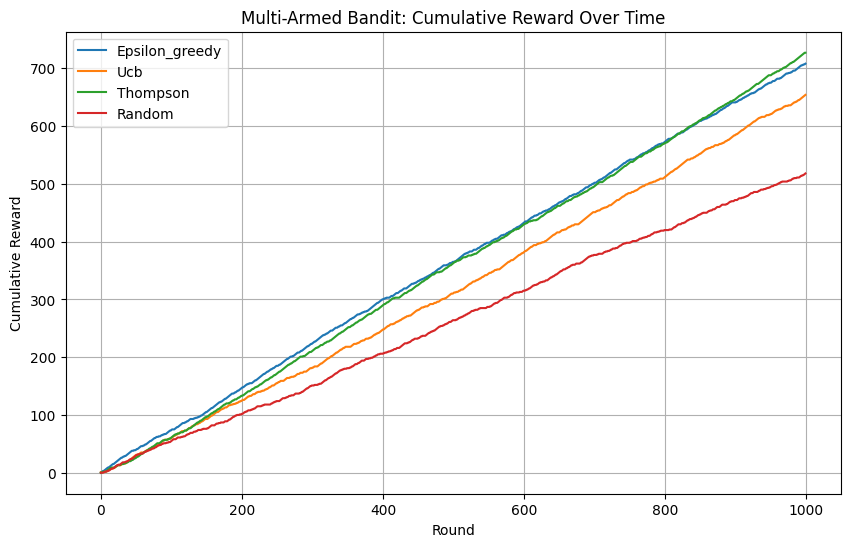

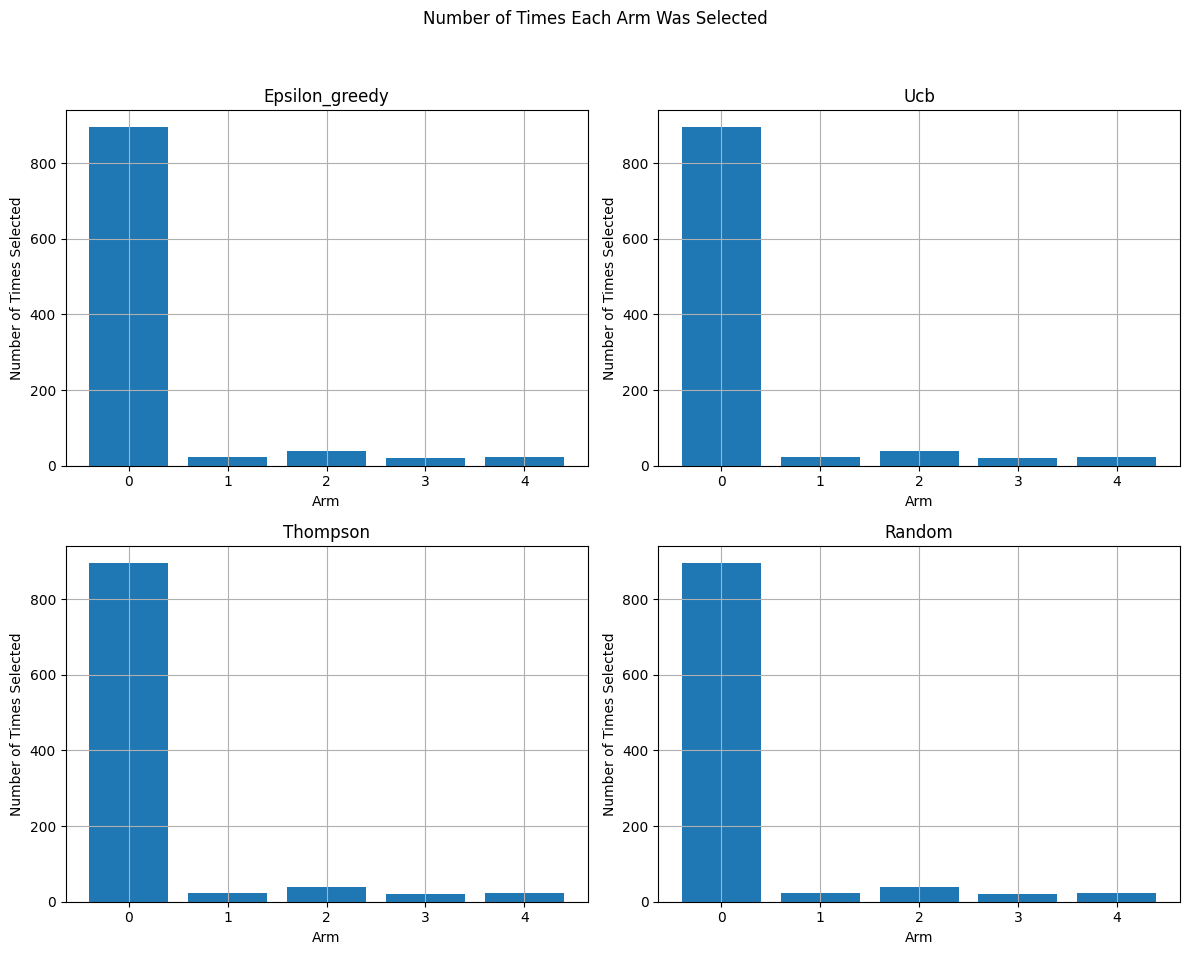

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_arms = 5
true_means = np.random.rand(n_arms)  # True reward probabilities for each arm
n_rounds = 1000

# Initialize parameters for all algorithms
estimated_means = np.zeros(n_arms)
counts = np.zeros(n_arms)
total_rewards = {'epsilon_greedy': 0, 'ucb': 0, 'thompson': 0, 'random': 0}
rewards = {'epsilon_greedy': [], 'ucb': [], 'thompson': [], 'random': []}

# Epsilon-Greedy parameters
epsilon = 0.1

# Upper Confidence Bound (UCB) parameters
ucb_counts = np.zeros(n_arms)
ucb_means = np.zeros(n_arms)

# Thompson Sampling parameters
alpha = np.ones(n_arms)
beta = np.ones(n_arms)

# Simulation
for t in range(1, n_rounds + 1):
    # Epsilon-Greedy
    if np.random.rand() < epsilon:
        arm = np.random.choice(n_arms)
    else:
        arm = np.argmax(estimated_means)
    reward = np.random.rand() < true_means[arm]
    counts[arm] += 1
    estimated_means[arm] += (reward - estimated_means[arm]) / counts[arm]
    total_rewards['epsilon_greedy'] += reward
    rewards['epsilon_greedy'].append(total_rewards['epsilon_greedy'])

    # UCB
    ucb_values = ucb_means + np.sqrt(2 * np.log(t) / (ucb_counts + 1))
    arm = np.argmax(ucb_values)
    reward = np.random.rand() < true_means[arm]
    ucb_counts[arm] += 1
    ucb_means[arm] += (reward - ucb_means[arm]) / ucb_counts[arm]
    total_rewards['ucb'] += reward
    rewards['ucb'].append(total_rewards['ucb'])

    # Thompson Sampling
    theta = np.random.beta(alpha, beta)
    arm = np.argmax(theta)
    reward = np.random.rand() < true_means[arm]
    alpha[arm] += reward
    beta[arm] += 1 - reward
    total_rewards['thompson'] += reward
    rewards['thompson'].append(total_rewards['thompson'])

    # Random Sampling
    arm = np.random.choice(n_arms)
    reward = np.random.rand() < true_means[arm]
    total_rewards['random'] += reward
    rewards['random'].append(total_rewards['random'])

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
for strategy in rewards:
    plt.plot(rewards[strategy], label=strategy.capitalize())
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Multi-Armed Bandit: Cumulative Reward Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of times each arm was selected for each strategy
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Number of Times Each Arm Was Selected')

strategies = ['epsilon_greedy', 'ucb', 'thompson', 'random']
for i, strategy in enumerate(strategies):
    ax = axs[i//2, i%2]
    ax.bar(range(n_arms), counts)
    ax.set_xlabel('Arm')
    ax.set_ylabel('Number of Times Selected')
    ax.set_title(strategy.capitalize())
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Sure! Let's create a comprehensive chapter on multi-armed bandits.

---

# Multi-Armed Bandits

## Introduction

Multi-armed bandit (MAB) problems are a class of sequential decision-making problems that model the trade-off between exploration and exploitation. The name comes from the metaphor of a gambler facing multiple slot machines (one-armed bandits), each with a different probability of payout. The gambler's objective is to maximize their total reward over a series of pulls. In the context of electricity markets, multi-armed bandit algorithms can be used for various purposes, such as optimizing dynamic pricing strategies, demand response programs, and marketing campaigns.

## Relevance in Electricity Markets

In electricity markets, decisions need to be made in real-time under uncertainty. Multi-armed bandit algorithms provide a powerful framework for optimizing these decisions by learning from past actions and balancing the trade-off between exploring new strategies and exploiting known profitable ones. For instance, they can help in:
- **Dynamic Pricing**: Adjusting prices based on consumer behavior to maximize revenue.
- **Demand Response**: Determining the most effective incentives to reduce peak demand.
- **Marketing Campaigns**: Identifying the most effective promotional strategies to increase customer engagement.

## Mathematical Formulation

The MAB problem can be formalized as follows:
- **Arms**: Let $K$ be the number of arms (choices or actions) available.
- **Rewards**: Each arm $k \in \{1, 2, \ldots, K\}$ provides a reward $r_k(t)$ at time $t$.
- **Objective**: The objective is to maximize the cumulative reward over $T$ rounds, \(\sum_{t=1}^{T} r_k(t)$.

### Key Concepts

1. **Exploration vs. Exploitation**: 
   - **Exploration**: Trying out different arms to gather more information about their rewards.
   - **Exploitation**: Choosing the arm that is currently believed to provide the highest reward.

2. **Regret**:
   - **Regret** is the difference between the reward obtained by the optimal arm and the reward obtained by the algorithm.
   - The goal is to minimize regret over time.

### Algorithms

Several algorithms can solve MAB problems, including:
- **Epsilon-Greedy**: With probability $\epsilon$, choose a random arm (exploration), and with probability $1 - \epsilon$, choose the arm with the highest estimated reward (exploitation).
- **Upper Confidence Bound (UCB)**: Selects arms based on the upper confidence bounds of their estimated rewards.
- **Thompson Sampling**: Uses Bayesian methods to update beliefs about the reward distributions and selects arms based on the posterior probabilities.

## Example in Python

Let's implement a simple multi-armed bandit problem using the Epsilon-Greedy algorithm.

### Step-by-Step Implementation

1. **Define the Environment**:
   - Simulate the reward probabilities for each arm.

2. **Implement the Epsilon-Greedy Algorithm**:
   - Initialize the estimates and counts for each arm.
   - Iterate through multiple rounds, selecting arms based on the epsilon-greedy strategy.

3. **Plot the Results**:
   - Visualize the cumulative rewards and the number of times each arm is selected.

```python
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_arms = 5
true_means = np.random.rand(n_arms)  # True reward probabilities for each arm

# Epsilon-Greedy parameters
epsilon = 0.1
n_rounds = 1000

# Initialize estimates and counts
estimated_means = np.zeros(n_arms)
counts = np.zeros(n_arms)
total_reward = 0
rewards = []

# Epsilon-Greedy algorithm
for t in range(1, n_rounds + 1):
    if np.random.rand() < epsilon:
        # Exploration: choose a random arm
        arm = np.random.choice(n_arms)
    else:
        # Exploitation: choose the best arm so far
        arm = np.argmax(estimated_means)
    
    # Simulate pulling the arm
    reward = np.random.rand() < true_means[arm]
    
    # Update estimates and counts
    counts[arm] += 1
    estimated_means[arm] += (reward - estimated_means[arm]) / counts[arm]
    
    # Accumulate rewards
    total_reward += reward
    rewards.append(total_reward)

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy: Cumulative Reward Over Time')
plt.grid(True)
plt.show()

# Plot the number of times each arm was selected
plt.figure(figsize=(10, 6))
plt.bar(range(n_arms), counts)
plt.xlabel('Arm')
plt.ylabel('Number of Times Selected')
plt.title('Epsilon-Greedy: Number of Times Each Arm Was Selected')
plt.grid(True)
plt.show()
```

### Explanation

1. **Environment Setup**:
   - `true_means` defines the true reward probabilities for each arm.
   
2. **Epsilon-Greedy Algorithm**:
   - With probability $\epsilon$, the algorithm explores by choosing a random arm.
   - With probability $1 - \epsilon$, the algorithm exploits by choosing the arm with the highest estimated reward.
   - The algorithm updates the reward estimates and keeps track of the total reward and the number of times each arm is selected.

3. **Visualization**:
   - The cumulative reward plot shows how the total reward accumulates over time.
   - The bar plot shows the number of times each arm was selected, indicating the balance between exploration and exploitation.

### Conclusion

Multi-armed bandit algorithms are powerful tools for making sequential decisions under uncertainty. By balancing exploration and exploitation, these algorithms can optimize decisions in various contexts, including dynamic pricing, demand response, and marketing campaigns in electricity markets. This tutorial demonstrated the basic principles and implementation of the Epsilon-Greedy algorithm, providing a foundation for more advanced techniques and applications.

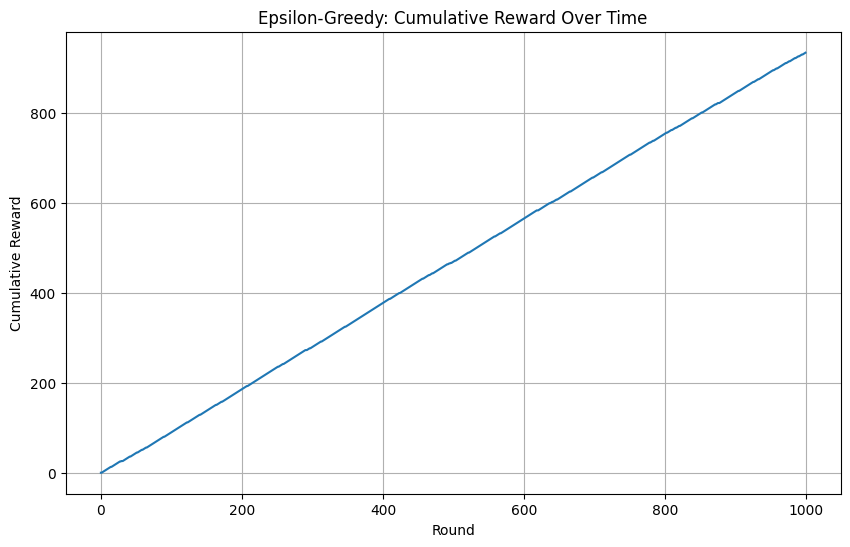

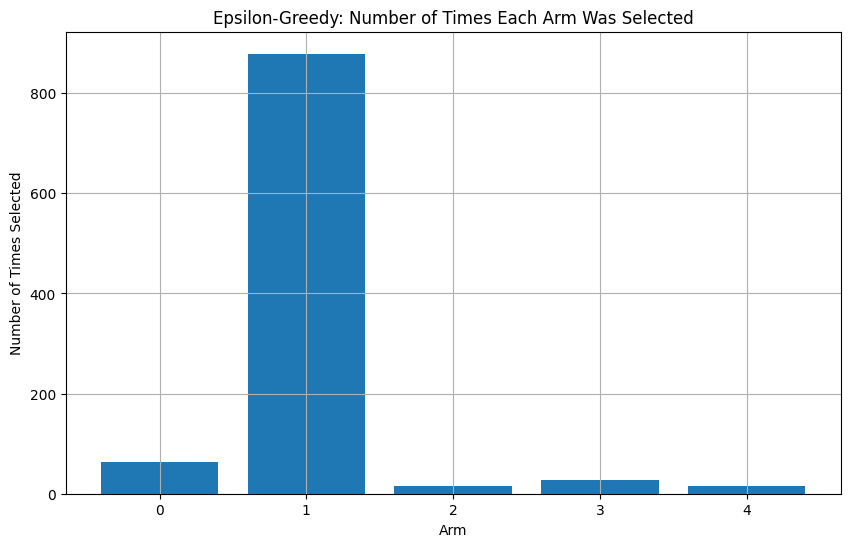

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_arms = 5
true_means = np.random.rand(n_arms)  # True reward probabilities for each arm

# Epsilon-Greedy parameters
epsilon = 0.1
n_rounds = 1000

# Initialize estimates and counts
estimated_means = np.zeros(n_arms)
counts = np.zeros(n_arms)
total_reward = 0
rewards = []

# Epsilon-Greedy algorithm
for t in range(1, n_rounds + 1):
    if np.random.rand() < epsilon:
        # Exploration: choose a random arm
        arm = np.random.choice(n_arms)
    else:
        # Exploitation: choose the best arm so far
        arm = np.argmax(estimated_means)
    
    # Simulate pulling the arm
    reward = np.random.rand() < true_means[arm]
    
    # Update estimates and counts
    counts[arm] += 1
    estimated_means[arm] += (reward - estimated_means[arm]) / counts[arm]
    
    # Accumulate rewards
    total_reward += reward
    rewards.append(total_reward)

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy: Cumulative Reward Over Time')
plt.grid(True)
plt.show()

# Plot the number of times each arm was selected
plt.figure(figsize=(10, 6))
plt.bar(range(n_arms), counts)
plt.xlabel('Arm')
plt.ylabel('Number of Times Selected')
plt.title('Epsilon-Greedy: Number of Times Each Arm Was Selected')
plt.grid(True)
plt.show()


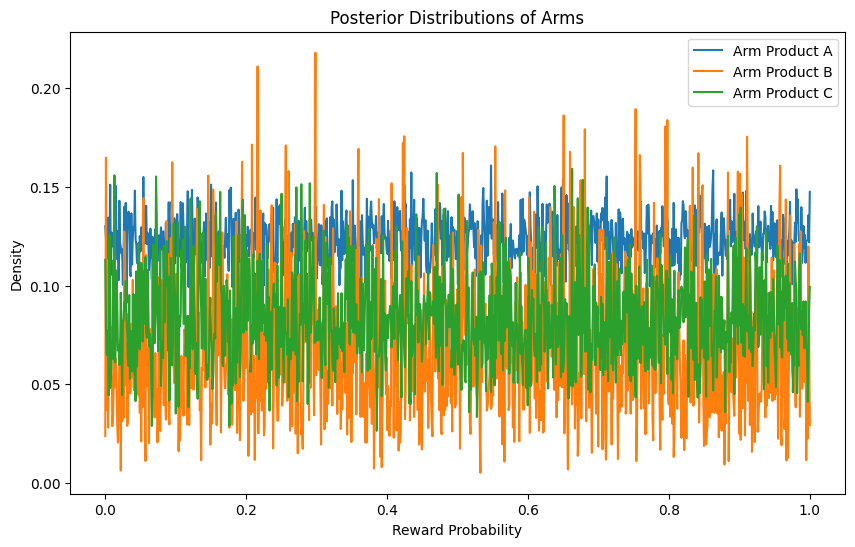

Mean Rewards Per Arm: {'Product A': 0.12333736396614269, 'Product B': 0.047619047619047616, 'Product C': 0.07633587786259542}
Total Rewards: [102.   2.  10.]
Priors (Alpha): [103.   3.  11.]
Priors (Beta): [726.  41. 122.]


In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the arms (e.g., product IDs or recommendation strategies)
arms = ['Product A', 'Product B', 'Product C']

# Function to simulate user interaction and reward (1 if purchased, 0 otherwise)
def simulate_reward(arm):
    # Simulated reward probabilities for each product
    reward_probabilities = {'Product A': 0.1, 'Product B': 0.15, 'Product C': 0.05}
    return 1 if random.random() < reward_probabilities[arm] else 0

# Initialize priors (alpha and beta) for each arm
alpha = np.ones(len(arms))
beta = np.ones(len(arms))

# Function to select an arm using Thompson Sampling
def thompson_sampling(alpha, beta):
    samples = [np.random.beta(alpha[i], beta[i]) for i in range(len(arms))]
    return np.argmax(samples)

# Simulate rounds of experimentation
n_rounds = 1000
rewards = np.zeros(len(arms))

for _ in range(n_rounds):
    chosen_arm = thompson_sampling(alpha, beta)
    reward = simulate_reward(arms[chosen_arm])
    
    # Update priors based on observed reward
    if reward == 1:
        alpha[chosen_arm] += 1
    else:
        beta[chosen_arm] += 1
    
    rewards[chosen_arm] += reward

# Print results
total_rewards = rewards
priors_alpha = alpha
priors_beta = beta

# Plot the posterior distributions
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))
for i in range(len(arms)):
    plt.plot(x, np.random.beta(alpha[i], beta[i], size=1000), label=f'Arm {arms[i]}')

plt.title('Posterior Distributions of Arms')
plt.xlabel('Reward Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate the mean reward for each arm
mean_rewards = rewards / (alpha + beta - 2)
mean_rewards_per_arm = {arms[i]: mean_rewards[i] for i in range(len(arms))}
print("Mean Rewards Per Arm:", mean_rewards_per_arm)
print("Total Rewards:", total_rewards)
print("Priors (Alpha):", priors_alpha)
print("Priors (Beta):", priors_beta)
